# 이상치
- 결측치, 범위에서 벗어나는 데이터, 값이 크게 벗어나는 데이터
- 분석 모델의 성능을 떨어뜨리거나 결과에 악영향을 미치는 경우가 발생
- 이상치는 발견 시에 특정한 데이터로 대체, 삭제
- 결측치를 확인하는 방법
    - isna()를 이용하여 결측치의 유무 판단하고 sum()을 이용해서 결측치의 개수를 확인
    - info()를 이용하여 non-null count를 보고 결측치의 존재를 파악
- 특정 범위에 벗어나는 데이터 확인하는 방법
    -isin()을 이용하여 특정 데이터의 포함 여부를 확인하고 전체 데이터를 비트연산자(~)로 부정을 하고 확인 가능
    - value_counts()를 이용하여 데이터의 개수를 보고 확인 가능
    - unique()을 이용하여 확인 가능
- 극단치 (값이 크게 벗어나는 데이터)
    - IQR 방식
        - matplot 안에 boxplot의 이상치를 결정하는 방법
        - Q3(3사분위수)와 Q1(1사분위수)를 이용하여 범위를 지정
        - IQR = Q3 - Q1
        - 극단치의 경계
            - 상단의 경계: Q3 + 1.5 * IQR
            - 하단의 경계: Q1 - 1.5 * IQR
        - 많은 데이터들이 이상치로 판단이 될 가능성이 존재
        - 1.5의 값을 조절해서 극단치의 범위를 변경

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [12]:
wine_data = load_wine()
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

- sklearn 라이브러리에서 sample data의 키
    - data
        - 독립변수
        - 머신러닝에서 문제 (학습 데이터)
    - target
        - 종속변수
        - 독립변수를 이용하여 예측에 대한 답
    - frame
        - 독립변수와 종속변수 데이터를 데이터프레임으로 제공
        - 데이터가 존재하는 경우와 존재하지 않는 경우가 있다.
    - target_names
        - 종속변수의 의미
    - DESCR
        - 데이터의 정보를 확인
    - feature_names
        - 피쳐(컬럼)의 이름을 의미

In [17]:
wine_data['DESCR']

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 178\n:Number of Attributes: 13 numeric, predictive attributes and the class\n:Attribute Information:\n    - Alcohol\n    - Malic acid\n    - Ash\n    - Alcalinity of ash\n    - Magnesium\n    - Total phenols\n    - Flavanoids\n    - Nonflavanoid phenols\n    - Proanthocyanins\n    - Color intensity\n    - Hue\n    - OD280/OD315 of diluted wines\n    - Proline\n    - class:\n        - class_0\n        - class_1\n        - class_2\n\n:Summary Statistics:\n\n============================= ==== ===== ======= =====\n                                Min   Max   Mean     SD\n============================= ==== ===== ======= =====\nAlcohol:                      11.0  14.8    13.0   0.8\nMalic Acid:                   0.74  5.80    2.34  1.12\nAsh:                          1.36  3.23    2.36  0.27\nAlcalinity of Ash:            10.6  30.0    19.5   3.3\nMagnesium:      

In [21]:
wine = pd.DataFrame(
    data = wine_data['data'],
    columns = wine_data['feature_names']
)
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [23]:
# target_data를 데이터프레임에 추가 -> 파생변수 생성
wine['class'] = wine_data['target']
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

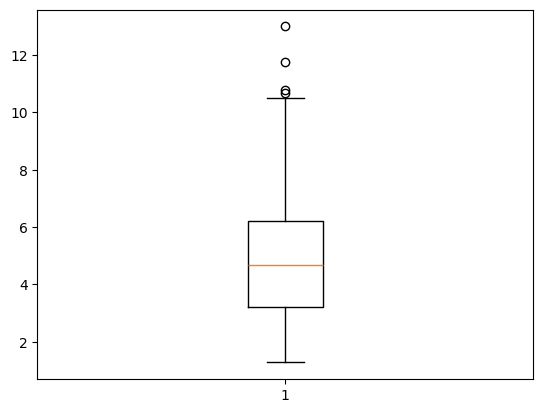

In [25]:
# 특정 컬럼을 선택해서 boxplot()를 그린다.
plt.boxplot(wine['color_intensity'])
plt.show()

In [54]:
# 사분위수를 decribe를 이용하여 출력이 가능
wine['color_intensity'].describe()['75%']

np.float64(6.2)

In [36]:
# numpy를 이용하여 사분위수를 출력
q_1, q_3 = np.percentile(
    wine['color_intensity'],
    [25, 75]
)

In [37]:
q_1

np.float64(3.2199999999999998)

In [41]:
# IQR계산 3사분위수 - 1사분위수
iqr = q_3 - q_1
# 상단의 경계 값
upper_whis = q_3 + (1.5 * iqr)
# 하단의 경계 값
lower_whis = q_1 - (1.5 * iqr)
print(upper_whis, lower_whis)

10.670000000000002 -1.2500000000000009


In [45]:
# 상단의 경계 값보다 크거나 하단의 경계보다 작은 데이터를 확인
flag = (wine['color_intensity'] > upper_whis) | (wine['color_intensity'] < lower_whis)

In [76]:
wine.loc[~flag, ]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


- 극단치의 데이터를 제거하는 방법
    - drop()를 이용하여 제거
    - 극단치의 경계식인 flag를 부정(~)하여 필터링
    - 극단치의 데이터를 결측치로 대체하고 결측치를 제거하는 함수를 이용
        - 특정 컬럼들의 극단치를 확인하여 결측치로 대체하고 독립변수들의 결측치 존재 유무를 행 단위로 파악하여 극단치의 개수를 확인하고 제거할지 정한다.
- 극단치의 데이터를 특정 데이터로 대체하는 방법
    - Series = 단일데이터 -> 시리즈의 모든 value가 단일 데이터로 변경
        - series -> 극단치의 상단/하단 경계, 특정 컬럼명 = 상단/하단 경계 값
    - 대입 연산자를 사용하기 전에 백업 데이터를 구성

In [77]:
df = wine.copy()

In [79]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [81]:
# 극단치의 경계의 데이터를 특정 값으로 대체
# 상단의 경계보다 큰 조건식 -> 참인 경우 color_intensity 데이터를 upper_whis
upper_flag = df['color_intensity'] > upper_whis
lower_flag = df['color_intensity'] < lower_whis

In [93]:
df.loc[upper_flag, 'color_intensity'] = upper_whis
df.loc[lower_flag, 'color_intensity'] = lower_whis

In [92]:
df.loc[df['color_intensity'] ==  upper_whis, ]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.67,0.48,1.47,480.0,2
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,10.67,0.57,1.96,660.0,2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,10.67,0.57,1.78,620.0,2
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.67,0.85,1.56,695.0,2


- 극단치를 확인하고 처리할 수 있는 함수 생성
    - 매개변수 4개
        - data -> 필수항목 -> 데이터프레임
        - cols -> 컬럼을 선택 -> 인자의 개수가 가변인 경우 -> 인자가 0개라면 모든 컬럼
        - cnt -> 극단치의 범위 지정 -> 기본값은 1.5
        - type -> 되돌려주는 데이터의 타입 -> 기본값은 'dict' -> dict인 경우에는 key를 컬럼의 이름, value는 해당 컬럼의 극단치에 해당하는 데이터프레임 -> df인 경우에는 극단치에 해당하는 데이터들을 결측치로 대체

    - 기준이 되는 컬럼의 개수만큼 반복 실행
        - 컬럼의 데이터에서 iqr을 구하고 상단의 경계, 하단의 경계 값을 변수에 저장
        - type이 dict이라면
            - 데이터프레임에서 해당 경계에서 벗어나는 부분을 데이터프레임으로 생성
            - 빈 dict에 데이터를 채워준다
            - 반복을 종료하고 dict를 되돌려준다
        - type이 df라면
            - 데이터프레임에서 해당 경계를 벗어나는 부분을 결측치로 채워준다.
            - 반복을 종료하고 데이터프레임을 되돌려준다

In [114]:
def outlier_iqr(_data, *_cols, _cnt = 1.5, _type = 'dict'):
    # 입력받은 데이터프레임의 복사본을 생성
    df = _data.copy()
    # _cols의 개수가 0개라면 모든 컬럼을 선택
    if _cols:
        # _cols에 대이터가 존재하는 경우
        cols = _cols
    else:
        # _cols에데이터가 존재하지 않는 경우
        cols = df.columns
    # 빈 딕셔너리 생성
    result = dict()
    # cols를 기준으로 반복문을 생성
    for col in cols:
        try: 
            # 컬럼의 데이터가 숫자가 아니라면 에러가 발생 -> 예외처리
            # 1사분위, 3사분위 수를 변수에 저장
            q_1, q_3 = np.percentile(df[col], [25, 75])
            # iqr
            iqr = q_3 - q_1
            # 상단 경계 값 생성
            upper_whis = q_3 + (_cnt * iqr)
            lower_whis = q_1 - (_cnt * iqr)
            print(f"""
                    column : {col},
                    upper_whis_{upper_whis},
                    lower_whis = {lower_whis}
                """)        
            # 조건식 생성(상단의 경계보다 크거나 하단의 경계보다 작은 경우)
            flag = (df['col']>upper_whis) | (df['col']< lower_whis )
            # type에 따라 행동을 다르게 구현
            if _type == 'dict':
                # 극단치의 경계 데이터를 필터링
                outlier = df.loc[flag,]
                result[col] = outlier
            elif _type == 'df':
                # 극단치의 경계 밖에 있는 데이터를 결측치로 대체
                df.loc[flag, col] = np.nan
            else:
                print('_type의 값이 잘못되었습니다. dict, df를 선택하세요')
                return ''
        except Exception as e:
            print("error : ", e)
            print('column : ', col)
    if _type == 'df':
        result = df
    return result
    

In [127]:
outlier_iqr(wine, _type = 'df')


                    column : alcohol, 
                    upper_whis : 15.650000000000002, 
                    lower_whis : 10.389999999999997
                

                    column : malic_acid, 
                    upper_whis : 5.3025, 
                    lower_whis : -0.6174999999999997
                

                    column : ash, 
                    upper_whis : 3.0787500000000003, 
                    lower_whis : 1.6887499999999998
                

                    column : alcalinity_of_ash, 
                    upper_whis : 27.950000000000003, 
                    lower_whis : 10.749999999999998
                

                    column : magnesium, 
                    upper_whis : 135.5, 
                    lower_whis : 59.5
                

                    column : total_phenols, 
                    upper_whis : 4.3862499999999995, 
                    lower_whis : 0.15625000000000022
                

                    column : flavanoids, 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,NaN,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [128]:
outlier = outlier_iqr(wine, _type = 'df')


                    column : alcohol, 
                    upper_whis : 15.650000000000002, 
                    lower_whis : 10.389999999999997
                

                    column : malic_acid, 
                    upper_whis : 5.3025, 
                    lower_whis : -0.6174999999999997
                

                    column : ash, 
                    upper_whis : 3.0787500000000003, 
                    lower_whis : 1.6887499999999998
                

                    column : alcalinity_of_ash, 
                    upper_whis : 27.950000000000003, 
                    lower_whis : 10.749999999999998
                

                    column : magnesium, 
                    upper_whis : 135.5, 
                    lower_whis : 59.5
                

                    column : total_phenols, 
                    upper_whis : 4.3862499999999995, 
                    lower_whis : 0.15625000000000022
                

                    column : flavanoids, 

In [131]:
outlier.isna().sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [126]:
outlier.loc[
    outlier.isna().any(axis = 1)
]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
25,13.05,2.05,NaN,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0.0
59,12.37,0.94,NaN,NaN,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1.0
69,12.21,1.19,1.75,16.8,NaN,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,1.0
73,12.99,1.67,2.60,NaN,NaN,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1.0
78,12.33,0.99,1.95,14.8,NaN,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1.0
95,12.47,1.52,2.20,19.0,NaN,2.50,2.27,0.32,NaN,2.60,1.16,2.63,937.0,1.0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,NaN,2.90,0.75,2.81,562.0,1.0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,NaN,2.87,407.0,1.0
121,11.56,2.05,NaN,NaN,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1.0
123,13.05,NaN,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1.0


In [134]:
# 데이터에서 결측치가 2개 이상인 인덱스 데이터를 출력?
outlier_flag = outlier.isna().sum(axis=1) >= 2
outlier.loc[outlier_flag,]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
59,12.37,0.94,NaN,NaN,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1.0
73,12.99,1.67,2.6,NaN,NaN,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1.0
95,12.47,1.52,2.2,19.0,NaN,2.50,2.27,0.32,NaN,2.60,1.16,2.63,937.0,1.0
121,11.56,2.05,NaN,NaN,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1.0


In [141]:
# 결측치가 포함되어 있는 데이터를 모두 제거
outlier.dropna(axis = 0)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [143]:
outlier.loc[
    (outlier.isna().any(axis = 1))
]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
25,13.05,2.05,NaN,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0.0
59,12.37,0.94,NaN,NaN,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1.0
69,12.21,1.19,1.75,16.8,NaN,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,1.0
73,12.99,1.67,2.60,NaN,NaN,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1.0
78,12.33,0.99,1.95,14.8,NaN,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1.0
95,12.47,1.52,2.20,19.0,NaN,2.50,2.27,0.32,NaN,2.60,1.16,2.63,937.0,1.0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,NaN,2.90,0.75,2.81,562.0,1.0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,NaN,2.87,407.0,1.0
121,11.56,2.05,NaN,NaN,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1.0
123,13.05,NaN,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1.0


# 범주형 데이터의 변환
- 범주형 변수는 학습 모델이 대부분 수학적인 연산으로 모델을 생성하는데 직접적으로 사용이 어렵기 때문에 특별 가공 처리
- 더미 변수 사용
- 더미 변수는 범주형 데이터를 각각의 컬럼으로 생성 -> 0과 1로 데이터를 대입하여 포함여부를 생성

In [153]:
wine_data['target_names'][2]

np.str_('class_2')

In [154]:
wine['class'].map(
    lambda x : wine_data['target_names'][x]
)

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Name: class, Length: 178, dtype: object

In [157]:
wine['class'] = wine['class'].map(
    {
        0 : 'Class_0',
        1 : 'Class_1',
        2 : 'Class_2'
    }
)

In [160]:
# 더미 변수를 생성하는 함수
# 가져오다(get) + 더미들 (dummies) = get_dummies()
pd.get_dummies(wine, columns = ['class'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class_Class_0,class_Class_1,class_Class_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,True,False,False
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,True,False,False
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,True,False,False
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,True,False,False
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,False,False,True
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,False,False,True
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,False,False,True
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,False,False,True
